In [1]:
from cookie_clusters import *

In [2]:
import sys
# show the python path
display(sys.path)
sys.path.append('/home/julian/FilRouge_territoires')
display(sys.path)

['/home/julian/FilRouge_territoires/notebooks',
 '/home/julian/miniconda3/envs/FilRouge/lib/python39.zip',
 '/home/julian/miniconda3/envs/FilRouge/lib/python3.9',
 '/home/julian/miniconda3/envs/FilRouge/lib/python3.9/lib-dynload',
 '',
 '/home/julian/miniconda3/envs/FilRouge/lib/python3.9/site-packages']

['/home/julian/FilRouge_territoires/notebooks',
 '/home/julian/miniconda3/envs/FilRouge/lib/python39.zip',
 '/home/julian/miniconda3/envs/FilRouge/lib/python3.9',
 '/home/julian/miniconda3/envs/FilRouge/lib/python3.9/lib-dynload',
 '',
 '/home/julian/miniconda3/envs/FilRouge/lib/python3.9/site-packages',
 '/home/julian/FilRouge_territoires']

In [3]:
from models.multiple_cluster_combination_system import CollaborativeClustering

In [4]:
import pickle
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import HDBSCAN
import umap
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [5]:
file = open('../data/processed/pixels_de_interet_dic.pkl', 'rb')
dic_de_pixels = pickle.load(file)
file.close()

file = open('../data/processed/pixels_de_interet_list.pkl', 'rb')
pixels_de_interet = pickle.load(file)
file.close()

matrice_nir = pd.read_csv('../data/processed/vec_nir.csv').to_numpy()
matrice_rouge = pd.read_csv('../data/processed/vec_red.csv').to_numpy()
matrice_vert = pd.read_csv('../data/processed/vec_green.csv').to_numpy()
matrice_bleu = pd.read_csv('../data/processed/vec_blue.csv').to_numpy()
matrice_ndvi = pd.read_csv('../data/processed/vec_ndvi.csv').to_numpy()
matrice_ndwi = pd.read_csv('../data/processed/vec_ndwi.csv').to_numpy()

# ROUGE

In [6]:
matrice = np.delete(matrice_rouge,22,1)

In [7]:
support_matrice = pd.DataFrame(matrice)
support_matrice.head()

classes = list()

for i in pixels_de_interet:
    for j, k in zip(list(dic_de_pixels.keys()), range(0, len(list(dic_de_pixels.keys())))):
        if i in list(dic_de_pixels[j]):
            classes.append(k)

In [8]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(matrice)

/home/julian/miniconda3/envs/FilRouge/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [9]:
hdb = HDBSCAN()
hdb.fit(embedding)
yhat_rouge = hdb.labels_

# VERT

In [10]:
matrice = np.delete(matrice_vert,22,1)

In [11]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(matrice)

/home/julian/miniconda3/envs/FilRouge/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [12]:
hdb = HDBSCAN()
hdb.fit(embedding)
yhat_vert = hdb.labels_

# Bleu

In [13]:
matrice = np.delete(matrice_bleu,22,1)

In [14]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(matrice)

/home/julian/miniconda3/envs/FilRouge/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [15]:
hdb = HDBSCAN()
hdb.fit(embedding)
yhat_bleu= hdb.labels_

In [16]:
yhat_rouge

array([ 8, -1,  8,  9,  9, -1, 11, -1,  9,  8, 11,  9, -1, -1,  9,  8,  6,
       10, -1,  6, 10,  9,  6,  8, 10, 10, 10, -1, 12,  8,  8, 11,  8, -1,
       13, -1, 11, -1, 10, 11, 11,  8, 10,  9,  9,  8, 11,  9,  9, 10, 10,
        9, 12, 10, 13,  9,  9,  9,  9, -1,  6, -1, 12, -1, 10, -1, -1, -1,
        6,  9, 11, 14,  7, -1,  7, 14,  7,  7,  7,  7, 12,  7,  7,  7,  0,
       -1, 13, 13,  7, 13,  7, 14, 14, 14,  7, 14,  7,  7,  7, 13, 13, -1,
       14, 14,  7,  7,  7,  7,  7,  7,  7, 13,  7,  7,  7,  5,  7,  7,  7,
        7,  7,  6, -1,  6,  6,  6,  6,  6,  6,  6,  6, -1,  6,  6,  6, 13,
        6,  6, -1,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6, -1,  6,  6,  6,  6,  6,  6,  6,  7,  6,
        6, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12,  4,  4,  4,  4,  4,  4,  4,  7,  7, 14,
       13,  7, 13,  7, 13,  7, 14, 13, 13, 13, 13,  0, 13,  7, 13,  0,  0,
        0,  0,  0,  0,  0

# Votating

In [17]:
vote = CollaborativeClustering(yhat_rouge, yhat_vert, yhat_bleu)

In [18]:
yhat = vote.iccm()

/home/julian/FilRouge_territoires/models/multiple_cluster_combination_system.py:41: RuntimeWarning: invalid value encountered in scalar divide
  confusion[i, j] = confusion[i, j]/(max(confusion[i, :].sum(),


IndexError: tuple index out of range

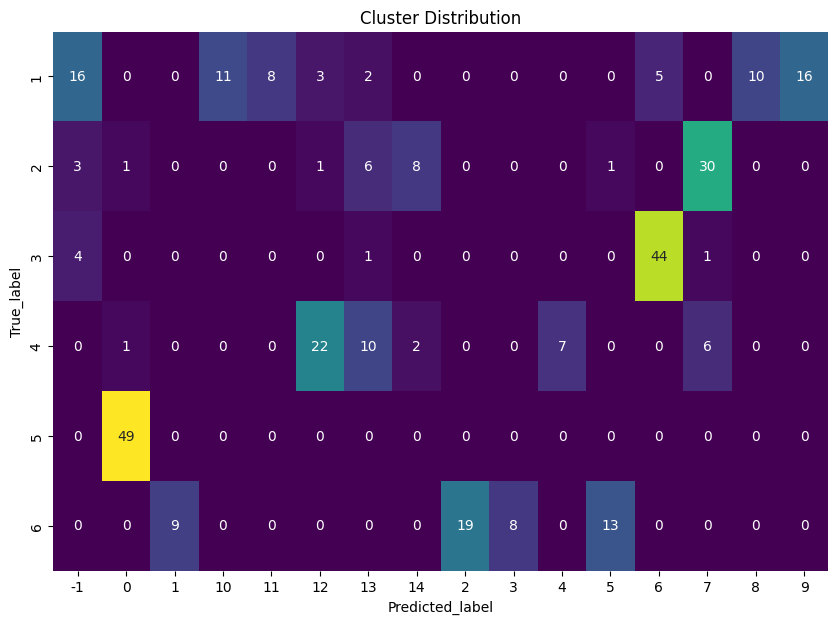

In [20]:
evaluator = evaluator_de_experiences(yhat_rouge, pixels_de_interet, dic_de_pixels, matrice)
evaluator.cluster_distribution()